In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import mean_squared_error

### Import data

dataset comes from https://insights.stackoverflow.com/survey

In [255]:
df_2023 = pd.read_csv("data/survey_results_public_2023.csv", usecols = ["Country","DevType","EdLevel","WorkExp","YearsCode","ConvertedCompYearly","Employment"])
df_2022 = pd.read_csv("data/survey_results_public_2022.csv", usecols =["Country","DevType","EdLevel","WorkExp","YearsCode","ConvertedCompYearly","Employment"])
df = pd.concat([df_2022, df_2023], ignore_index = True)

In [256]:
df.head(3)

,Employment,EdLevel,YearsCode,DevType,Country,WorkExp,ConvertedCompYearly
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Employed, full-time",NaN,NaN,NaN,Canada,NaN,NaN
2,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,Data scientist or machine learning specialist;...,United Kingdom of Great Britain and Northern I...,NaN,40205.0


In [257]:
df = df[df.Employment == "Employed, full-time"]
df.drop("Employment", axis=1, inplace=True)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96710 entries, 1 to 162451
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EdLevel              96642 non-null  object 
 1   YearsCode            96211 non-null  object 
 2   DevType              96338 non-null  object 
 3   Country              96710 non-null  object 
 4   WorkExp              65089 non-null  float64
 5   ConvertedCompYearly  70803 non-null  float64
dtypes: float64(2), object(4)
memory usage: 5.2+ MB


### Drop value

In [259]:
df.isnull().sum()

EdLevel                   68
YearsCode                499
DevType                  372
Country                    0
WorkExp                31621
ConvertedCompYearly    25907
dtype: int64

In [260]:
len(df.DevType.value_counts())

6420

In [261]:
df.DevType.value_counts().head(30)

Developer, full-stack                                                                                           23242
Developer, back-end                                                                                             15098
Developer, front-end                                                                                             5443
Developer, desktop or enterprise applications                                                                    3403
Developer, mobile                                                                                                2965
Other (please specify):                                                                                          2848
Engineering manager                                                                                              2220
Developer, embedded applications or devices                                                                      1959
Data scientist or machine learning specialist           

Too many DevType, only keep top 30

In [262]:
df.DevType = df.DevType.replace("Other (please specify):", "Other")

In [263]:
DevType_list = df.DevType.value_counts().head(30).index.to_list()

In [264]:
DevType_list

['Developer, full-stack',
 'Developer, back-end',
 'Developer, front-end',
 'Developer, desktop or enterprise applications',
 'Developer, mobile',
 'Other',
 'Engineering manager',
 'Developer, embedded applications or devices',
 'Data scientist or machine learning specialist',
 'Developer, front-end;Developer, full-stack;Developer, back-end',
 'Engineer, data',
 'DevOps specialist',
 'Developer, full-stack;Developer, back-end',
 'Senior Executive (C-Suite, VP, etc.)',
 'Academic researcher',
 'Research & Development role',
 'Cloud infrastructure engineer',
 'Data or business analyst',
 'Developer, front-end;Developer, full-stack',
 'Developer, QA or test',
 'System administrator',
 'Developer, game or graphics',
 'Developer, back-end;Developer, desktop or enterprise applications',
 'Project manager',
 'Engineer, site reliability',
 'Product manager',
 'Security professional',
 'Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications

In [265]:
df = df[df.DevType.isin(DevType_list)]

In [266]:
df.DevType.value_counts()

Developer, full-stack                                                                                           23242
Developer, back-end                                                                                             15098
Developer, front-end                                                                                             5443
Developer, desktop or enterprise applications                                                                    3403
Developer, mobile                                                                                                2965
Other                                                                                                            2848
Engineering manager                                                                                              2220
Developer, embedded applications or devices                                                                      1959
Data scientist or machine learning specialist           

In [267]:
df.YearsCode=df.YearsCode.replace("More than 50 years", "55")
df.YearsCode=df.YearsCode.replace("Less than 1 year", "0.5")
df = df.dropna(subset=['YearsCode'])

In [268]:
df = df[df.ConvertedCompYearly.notnull()]

In [269]:
df.loc[df['DevType'].isnull(), 'DevType'] = "Unknown"

In [270]:
group_columns = ["Country", "DevType","EdLevel", "YearsCode"]
grouped = df.groupby(group_columns).transform("mean")

In [271]:
df['WorkExp'] = df['WorkExp'].fillna(grouped['WorkExp'])

In [272]:
df = df.dropna()

In [273]:
df.isnull().sum()

EdLevel                0
YearsCode              0
DevType                0
Country                0
WorkExp                0
ConvertedCompYearly    0
dtype: int64

### Combine similar content

In [274]:
df.DevType = df.DevType.replace("Other (please specify):", "Others")
df.DevType = df.DevType.replace("Unknown", "Others")

### Convert categorical value to numeric value

In [275]:
country_to_select = df.Country.value_counts().index[df.Country.value_counts() > 1200].to_list()
country_to_select

['United States of America',
 'United Kingdom of Great Britain and Northern Ireland',
 'Germany',
 'India',
 'Canada',
 'France',
 'Brazil']

In [276]:
df = df[df['Country'].isin(country_to_select)]

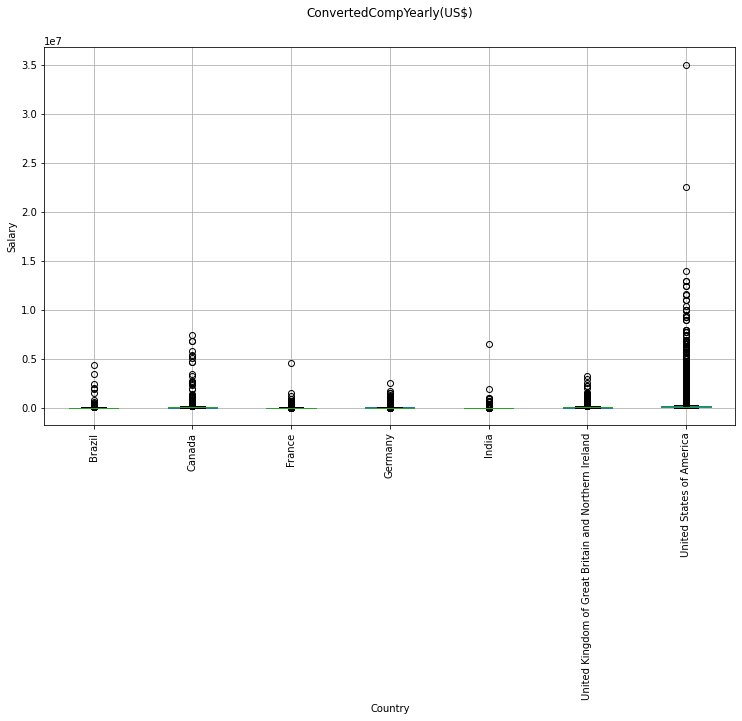

In [277]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('ConvertedCompYearly', 'Country', ax=ax)
plt.suptitle('ConvertedCompYearly(US$)')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [278]:
df = df[df["ConvertedCompYearly"] <= 250000]
df = df[df["ConvertedCompYearly"] >= 10000]

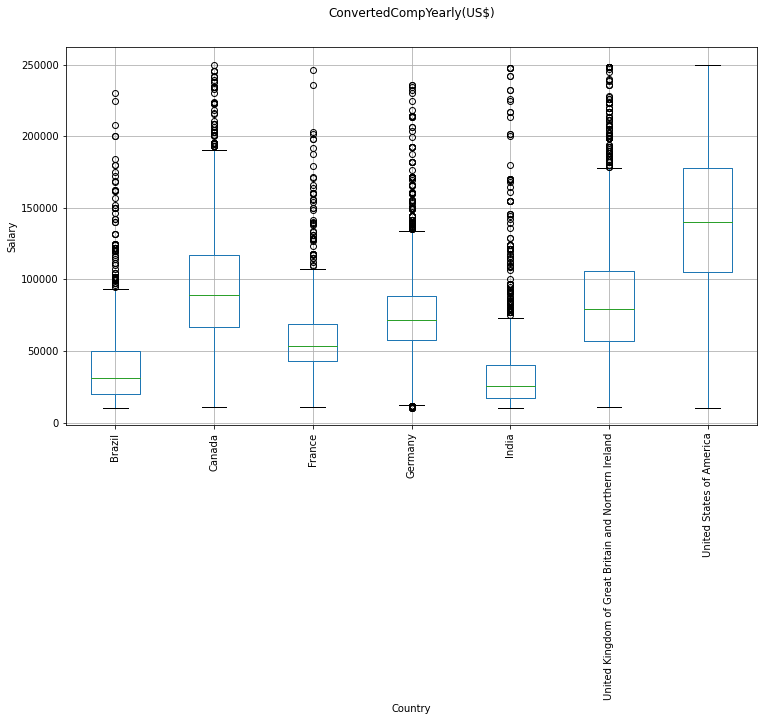

In [279]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('ConvertedCompYearly', 'Country', ax=ax)
plt.suptitle('ConvertedCompYearly(US$)')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [280]:
dic_Age = {"Under 18 years old": 15, "18-24 years old": 18, "25-34 years old": 25, "35-44 years old": 35, "45-54 years old": 45, "55-64 years old": 55, "65 years or older": 65}

In [281]:
df = df.replace(dic_Age)

In [282]:
dic_EdLevel = {"Something else": 1, "Primary/elementary school": 1, "Associate degree (A.A., A.S., etc.)": 1, "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": 1, "Some college/university study without earning a degree": 1, "Bachelor’s degree (B.A., B.S., B.Eng., etc.)":2, "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)":3,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)": 4, "Professional degree (JD, MD, etc.)": 4, "Other doctoral degree (Ph.D., Ed.D., etc.)": 4}

In [283]:
df = df.replace(dic_EdLevel)

In [284]:
df.EdLevel.value_counts()

2    14434
3     6642
1     4557
4      977
Name: EdLevel, dtype: int64

In [285]:
df.head()

,EdLevel,YearsCode,DevType,Country,WorkExp,ConvertedCompYearly
10,2,5,"Developer, full-stack;Developer, back-end",United Kingdom of Great Britain and Northern I...,5.000000,60307.0
12,2,12,"Developer, full-stack",United States of America,5.000000,65000.0
22,1,25,"Developer, back-end",Canada,23.000000,97605.0
26,2,10,"Developer, full-stack;Developer, back-end",United States of America,7.538462,106960.0
31,2,24,"Developer, full-stack",United States of America,21.000000,102000.0


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26610 entries, 10 to 162438
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EdLevel              26610 non-null  int64  
 1   YearsCode            26610 non-null  object 
 2   DevType              26610 non-null  object 
 3   Country              26610 non-null  object 
 4   WorkExp              26610 non-null  float64
 5   ConvertedCompYearly  26610 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB


In [287]:
df["EdLevel"] = pd.to_numeric(df["EdLevel"] )

In [288]:
df["YearsCode"] = pd.to_numeric(df["YearsCode"])

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26610 entries, 10 to 162438
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EdLevel              26610 non-null  int64  
 1   YearsCode            26610 non-null  float64
 2   DevType              26610 non-null  object 
 3   Country              26610 non-null  object 
 4   WorkExp              26610 non-null  float64
 5   ConvertedCompYearly  26610 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.4+ MB


In [290]:
from sklearn.preprocessing import LabelEncoder
#df = pd.get_dummies(df, columns= ["Country", "DevType"])
LabelEncoder_Country = LabelEncoder()
df['Country'] = LabelEncoder_Country.fit_transform(df['Country']) 
LabelEncoder_DevType = LabelEncoder()
df['DevType'] = LabelEncoder_DevType.fit_transform(df['DevType']) 

In [291]:
df.astype(float)

,EdLevel,YearsCode,DevType,Country,WorkExp,ConvertedCompYearly
10,2.0,5.0,16.0,5.0,5.000000,60307.0
12,2.0,12.0,15.0,6.0,5.000000,65000.0
22,1.0,25.0,6.0,1.0,23.000000,97605.0
26,2.0,10.0,16.0,6.0,7.538462,106960.0
31,2.0,24.0,15.0,6.0,21.000000,102000.0
...,...,...,...,...,...,...
162422,2.0,20.0,11.0,6.0,8.000000,75000.0
162424,2.0,12.0,21.0,6.0,8.000000,195000.0
162430,3.0,30.0,6.0,0.0,25.000000,50719.0
162435,2.0,6.0,18.0,4.0,2.000000,15752.0


In [292]:
df

,EdLevel,YearsCode,DevType,Country,WorkExp,ConvertedCompYearly
10,2,5.0,16,5,5.000000,60307.0
12,2,12.0,15,6,5.000000,65000.0
22,1,25.0,6,1,23.000000,97605.0
26,2,10.0,16,6,7.538462,106960.0
31,2,24.0,15,6,21.000000,102000.0
...,...,...,...,...,...,...
162422,2,20.0,11,6,8.000000,75000.0
162424,2,12.0,21,6,8.000000,195000.0
162430,3,30.0,6,0,25.000000,50719.0
162435,2,6.0,18,4,2.000000,15752.0


In [239]:
X = df.drop("ConvertedCompYearly", axis=1)
y = df["ConvertedCompYearly"]

In [240]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [241]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))

In [293]:
X = np.array([["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2, "Developer, back-end","Germany", 2]])

array([['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', '2',
        'Developer, back-end', 'Germany', '2']], dtype='<U47')

In [294]:
X[:, 3] = LabelEncoder_Country.transform(X[:,3])
X[:, 2] = LabelEncoder_DevType.transform(X[:,2])
X[0, 0] = dic_EdLevel[X[0, 0]] 

In [297]:
y_pred = regressor.predict(X)
y_pred

C:\Users\qujin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([68628.57027753])

In [298]:
data = {"model": regressor, "LabelEncoder_Country": LabelEncoder_Country, "LabelEncoder_DevType": LabelEncoder_DevType}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)